In [1]:
import matplotlib.pyplot as plt

from scripts import tabular_baselines

import seaborn as sns
import numpy as np

from datasets import load_openml_list, valid_dids_classification, test_dids_classification, open_cc_dids
from scripts.tabular_baselines import *
from scripts.tabular_evaluation import evaluate
from scripts.tabular_metrics import calculate_score, make_ranks_and_wins_table, make_metric_matrix
from scripts import tabular_metrics
from scripts.transformer_prediction_interface import TabPFNClassifier

In [2]:
from notebook_utils import *

In [3]:
%load_ext autoreload

%autoreload 2

# Datasets

In [4]:
from datasets import load_openml_list, open_cc_dids, open_cc_valid_dids, test_dids_classification

cc_valid_datasets_multiclass, cc_valid_datasets_multiclass_df = load_openml_list(open_cc_valid_dids, multiclass=True, shuffled=True, filter_for_nan=False, max_samples = 10000, num_feats=100, return_capped=True)


Number of datasets: 149


# Setting params

In [5]:
import os
eval_positions = [1000]
max_features = 100
bptt = 2000
base_path = os.path.join('.')
overwrite = False
#max_times = [0.5, 1, 15, 30, 60, 60*5, 60*15, 60*60]
#max_times = [1, 15]
max_times = [1, 15, 30, 60, 60 * 5, 60 * 15, 60*60]
metric_used = tabular_metrics.auc_metric
task_type = 'multiclass'

In [6]:
from scripts.distill_mlp import DistilledTabPFNMLP
from tabpfn.transformer_make_model import PermutationsMeta, ForwardMLPModel
from functools import partial
from scripts.tabular_baselines import knn_metric, catboost_metric, transformer_metric, logistic_metric, xgb_metric, random_forest_metric, mlp_metric


# Baseline Evaluation
This section runs baselines and saves results locally.

In [7]:
!mkdir -p {base_path}/results
!mkdir -p {base_path}/results/tabular/
!mkdir -p {base_path}/results/tabular/multiclass/

In [8]:
cc_valid_datasets_multiclass_df['isNumeric'] = (cc_valid_datasets_multiclass_df.NumberOfSymbolicFeatures == 1) & (cc_valid_datasets_multiclass_df.NumberOfInstancesWithMissingValues == 0) * (cc_valid_datasets_multiclass_df.NumberOfFeatures > 4)
name_indexed_dataset = cc_valid_datasets_multiclass_df.set_index("name")

numeric_valid_datasets = [ds for ds in cc_valid_datasets_multiclass if name_indexed_dataset.loc[ds[0]].isNumeric]
len(numeric_valid_datasets)

54

In [9]:
import os
os.environ["LD_LIBRARY_PATH"] = "/anaconda/envs/fresh311/lib:" + os.environ["LD_LIBRARY_PATH"]

In [10]:
from tabpfn.scripts.tabular_evaluation import eval_on_datasets
device = "cpu"
max_times = [1, 5, 15, 60, 5 * 60, 15 * 60]
clf_dict= {
    'knn': knn_metric,
    'rf_new_params': random_forest_metric,
    'xgb': xgb_metric,
    'logistic': logistic_metric,
    'mlp': mlp_metric}

results_baselines = [
    eval_on_datasets('multiclass', model, model_name, numeric_valid_datasets, eval_positions=eval_positions, max_times=max_times,
                     metric_used=metric_used, split_numbers=[1, 2, 3, 4, 5],
                     bptt=bptt, base_path=base_path, device=device)
    for model_name, model in clf_dict.items()
]

model_name  knn


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1301 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    0.2s


model_name  rf_new_params


[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    0.2s


model_name  xgb


[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s


model_name  logistic


[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


model_name  mlp


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 73.3min finished
Bad pipe message: %s [b"\t\xf97\x06\xc2{\xc56=\xd3\x90\xf4\xc3-h\xa9q\xbf #\x8f\x030T\x87\xdf\xb2\x8d\xa0\xdaor\x19+>V0'\xe1B\x18\xb9\xf7\x03\x9ad\xd4g\x9d\xbf\xe4\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0."]
Bad pipe message: %s [b'1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03']
Bad pipe message: %s [b'\x08\x07\x08\x08\x08', b'\n\x08\x0b\x08\x04\x08\x05\x08']
Bad pipe message: %s [b'\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"vN\x13S\x95G\xe3w\x7f\xafi^8{TBhB\x00\x00|\xc0,\xc00\x00\xa3

In [12]:
from tabpfn.scripts.tabular_evaluation import eval_on_datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# transformers don't have max times
import warnings
max_times = [1]
device = "cuda"

model_string = "defaults_k_aggregate_2_batch_128_onehot_classes_multiclass_02_10_2023_23_55_16"
tabpfn_mine =  TabPFNClassifier(device=device, model_string=model_string, epoch=82, N_ensemble_configurations=32)
distilled_tabpfn = DistilledTabPFNMLP(n_epochs=1000, device="cuda", hidden_size=128, n_layers=2, dropout_rate=.1, learning_rate=0.01, model_string=model_string, epoch=82, )
mother_model_string = "models_diff/prior_diff_real_checkpointcontinue_hidden_128_embed_dim_1024_decoder_nhid_2048_nlayer12_lr0003_n_0_epoch_65.cpkt"
forward_mlp = PermutationsMeta(ForwardMLPModel(path=mother_model_string))
mothernet_new = PermutationsMeta(ForwardMLPModel(path='models_diff/prior_diff_real_checkpointcontinue_hidden_128_embed_dim_1024_decoder_nhid_2048_nlayer12_lr0003_n_0_epoch_on_exit.cpkt'))
#mother_of_ensembles = BaggingClassifier(PermutationsMeta(ForwardMLPModel(path=mother_model_string)), max_features=.8, max_samples=.8)
#mother_of_ensembles_again = BaggingClassifier(PermutationsMeta(ForwardMLPModel(path=mother_model_string)), max_features=.5, max_samples=.5)
forward_mlp_scaled = make_pipeline(StandardScaler(), forward_mlp)
distilled_tabpfn_scaled = make_pipeline(StandardScaler(), distilled_tabpfn)

clf_dict= {
    
             'transformer': transformer_metric,
               'transformer_mine': partial(transformer_metric, classifier=tabpfn_mine),
                'distill_tabpfn_scaled':  partial(transformer_metric, classifier=distilled_tabpfn_scaled),
       #         'mother_of_ensembles': partial(transformer_metric, classifier=mother_of_ensembles),
       #         'mother_of_ensembles_again': partial(transformer_metric, classifier=mother_of_ensembles_again),

                'mother_net': partial(transformer_metric, classifier=forward_mlp),
                'mothernet_new': partial(transformer_metric, classifier=mothernet_new)
                  }
results_transformers = [
    eval_on_datasets('multiclass', model, model_name, numeric_valid_datasets, eval_positions=eval_positions, max_times=max_times,
                     metric_used=metric_used, split_numbers=[1, 2, 3, 4, 5],
                     bptt=bptt, base_path=base_path, device=device, overwrite=False)
    for model_name, model in clf_dict.items()
]

model_name  transformer


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 318.14it/s]


model_name  transformer_mine


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 318.24it/s]


model_name  distill_tabpfn_scaled


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 318.13it/s]


model_name  mother_net


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 321.39it/s]


model_name  mothernet_new


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 318.75it/s]


In [13]:
flat_results = []
for per_dataset in results_baselines + results_transformers:
    for result in per_dataset:
        row = {}
        for key in ['dataset', 'model', 'mean_metric', 'split', 'max_time']:
            row[key] = result[key]
        best_configs_key, = [k for k in result.keys() if "best_configs" in k]
        if result[best_configs_key][0] is not None:
            row.update(result[best_configs_key][0])
        row['mean_metric'] = float(row["mean_metric"].numpy())
        flat_results.append(row)

results_df = pd.DataFrame(flat_results)

In [14]:
results_df

,dataset,model,mean_metric,split,max_time,best,fit_time,inference_time
0,sonar,knn,0.863095,1,1,{'n_neighbors': 3},0.000334,0.001602
1,sonar,knn,0.878519,2,1,{'n_neighbors': 2},0.000302,0.001538
2,sonar,knn,0.880362,3,1,{'n_neighbors': 3},0.000343,0.001632
3,sonar,knn,0.882168,4,1,{'n_neighbors': 3},0.000626,0.002256
4,sonar,knn,0.902968,5,1,{'n_neighbors': 2},0.000244,0.001069
...,...,...,...,...,...,...,...,...
9445,Touch2,mothernet_new,0.947475,1,1,NaN,0.447886,0.004645
9446,Touch2,mothernet_new,0.962047,2,1,NaN,0.429828,0.004452
9447,Touch2,mothernet_new,0.953566,3,1,NaN,0.438542,0.004427
9448,Touch2,mothernet_new,0.954281,4,1,NaN,0.445876,0.004468


In [15]:
import pickle
with open("results_validation_all_new_lr003_mlp.pickle", "wb") as f:
    pickle.dump(results_baselines + results_transformers, f)

In [16]:
results_df.to_csv("results_validation_all_new_lr003_mlp.csv")

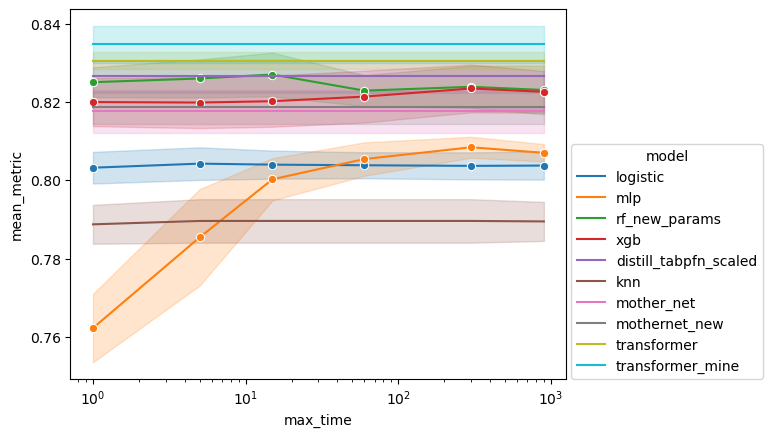

In [17]:
compare_splits = results_df.groupby(["model", "split", "max_time"])['mean_metric'].mean().reset_index()

import seaborn as sns
varies_over_time = ['logistic', 'xgb', 'rf_new_params', 'mlp']
compare_splits_varies = compare_splits[compare_splits.model.isin(varies_over_time)]
compare_splits_fixed = compare_splits[~compare_splits.model.isin(varies_over_time)]

color_palette = sns.color_palette()
ax = sns.lineplot(compare_splits_varies, x="max_time", y="mean_metric", hue="model", errorbar="sd", marker="o", palette=color_palette[:len(varies_over_time)])

compare_splits_fixed_dummy = compare_splits_fixed.copy()
compare_splits_fixed_dummy['max_time'] = compare_splits_varies.max_time.max()
sns.lineplot(pd.concat([compare_splits_fixed, compare_splits_fixed_dummy]),
             x="max_time", y="mean_metric", hue="model", errorbar="sd", ax=ax, palette=color_palette[len(varies_over_time):compare_splits.model.nunique()])
sns.move_legend(ax, (1.01, 0))
ax.set_xscale("log")

#ax.set_ylim(0.9, 0.95)

In [18]:
average_over_splits = results_df.groupby(["dataset", "model", "max_time"]).mean_metric.mean().reset_index()

In [19]:
best_over_time = average_over_splits.groupby(["dataset", "model"]).mean_metric.max().reset_index()
best_over_time

,dataset,model,mean_metric
0,CPMP-2015-runtime-classification,distill_tabpfn_scaled,0.714914
1,CPMP-2015-runtime-classification,knn,0.700998
2,CPMP-2015-runtime-classification,logistic,0.719434
3,CPMP-2015-runtime-classification,mlp,0.713141
4,CPMP-2015-runtime-classification,mother_net,0.716372
...,...,...,...
535,wisconsin,mothernet_new,0.656536
536,wisconsin,rf_new_params,0.617153
537,wisconsin,transformer,0.636941
538,wisconsin,transformer_mine,0.638679


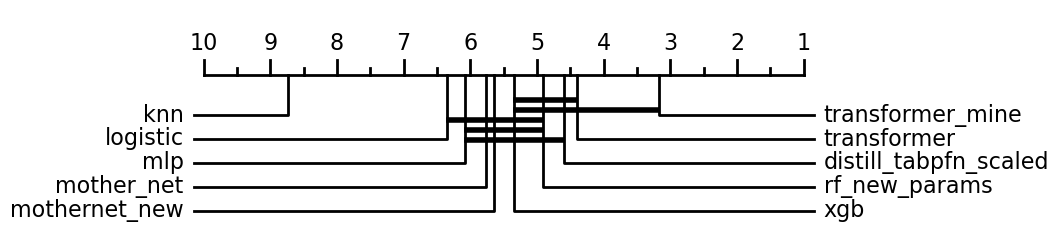

In [20]:
from tabpfn.scripts.critical_differences import draw_cd_diagram

best_over_time.columns = ['dataset_name', 'classifier_name', 'accuracy']
res = draw_cd_diagram(best_over_time, title="OVO ROC AUC");


In [21]:
results_df = results_df.drop_duplicates(subset=["dataset", "model", "split", "max_time"])

In [22]:
results_for_ranking = results_df.pivot(index="max_time", columns=["dataset", "split", "model"], values="mean_metric").ffill()

ranks_per_split_per_dataset = results_for_ranking.stack("model").unstack("max_time").rank(ascending=False)
average_ranks = ranks_per_split_per_dataset.stack("dataset").unstack("model").mean().reset_index(name="mean_rank")
average_ranks

,split,max_time,model,mean_rank
0,1,1,distill_tabpfn_scaled,4.703704
1,1,1,knn,7.620370
2,1,1,logistic,5.638889
3,1,1,mlp,7.805556
4,1,1,mother_net,5.370370
...,...,...,...,...
295,5,900,mothernet_new,5.861111
296,5,900,rf_new_params,5.055556
297,5,900,transformer,4.620370
298,5,900,transformer_mine,3.324074


Text(0.5, 0, 'max time (s)')

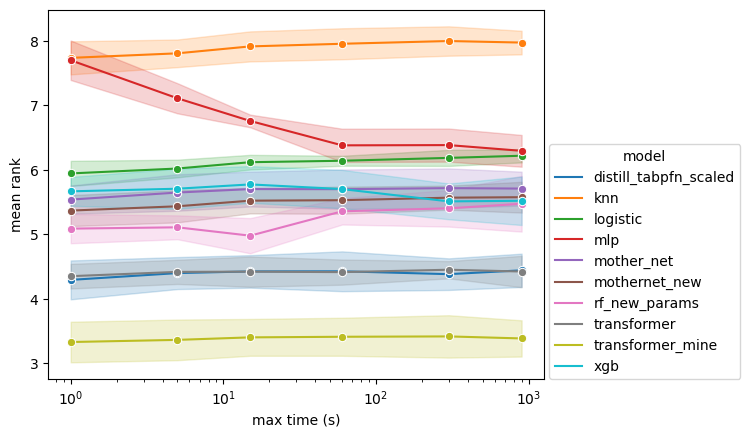

Bad pipe message: %s [b'\xc5\x1d\x87|\xab#TN\x15\xec\r\x8f;\xa5h.\xf7\xb5 \xe2-\x18E\r\x85\x8e\xe4\x9f\xec\xd6z\xb9\x00\xe5W\xe2\xb1Wp\xdb\x02\xf4\xb1\xe1\x83\xa5\xa75\x98=u\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c']
Bad pipe message: %s [b'\xbcb\xbc\xaan]\xbe\xa9\x15\x0fG\xb0\xe0\x0f\xa5\x8d\xe9\xb4 \x83\xd4E\xcb\xf4\xcbrsMZ\x9f\xab\x0e\x87;\xae\xb3\x01ffLH\xd3\xb5\xb2x\xe7\x8c\x8e8s\x0f\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04']
Bad pipe message: %s [b"\x04iUn\nJ\xb9rSzb\x919-\x97\x16\xbd\x1c\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\

In [23]:
ax = sns.lineplot(average_ranks, x="max_time", y="mean_rank", hue="model", errorbar="sd", marker="o")
ax.set_xscale("log")
sns.move_legend(ax, (1.01, 0))
ax.set_ylabel("mean rank")
ax.set_xlabel("max time (s)")